# Mercedes-Benz Greener Manufacturing
## Project by Muzamil Showkat

#### DESCRIPTION

#### Reduce the time a Mercedes-Benz spends on the test bench.

#### Problem Statement Scenario:
#### Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

#### To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

#### You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

#### Following actions should be performed:

#### If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
#### Check for null and unique values for test and train sets.
#### Apply label encoder.
#### Perform dimensionality reduction.
#### Predict your test_df values using XGBoost.


In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings ('ignore')

In [5]:
# load the datasets i.e train and test and check the shape of the datasets
train_data = pd.read_csv("train.csv")
train_data.shape

(4209, 378)

In [4]:
test_data =  pd.read_csv("test.csv")
test_data.shape

(4209, 377)

In [7]:
# check the head of the datasets i.e train_data and test_data
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


### Task: If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [9]:
# drop id and y and check the variance:
variance = pow(train_data.drop(columns={'ID','y'}).std(),2).to_dict()

In [12]:
for key , value in variance.items():
    if (value==0):
        print('Name = ',key)    

Name =  X11
Name =  X93
Name =  X107
Name =  X233
Name =  X235
Name =  X268
Name =  X289
Name =  X290
Name =  X293
Name =  X297
Name =  X330
Name =  X347


In [13]:
# drop these columns
train_data = train_data.drop(columns={'X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'})

In [14]:
# check the train_data shape now
train_data.shape

(4209, 366)

### Task: Check for null and unique values for test and train sets.

In [15]:
#checking the null values for train data
train_data.isnull().sum().any()

False

In [17]:
# checking the null values for test data
test_data.isnull().sum().any()

False

In [18]:
# create independent and dependent variable
train_data_feature = train_data.drop(columns = {'ID','y'})
train_data_target = train_data.y                                   

In [19]:
# check the shape
train_data_feature.shape

(4209, 364)

In [20]:
train_data_target.shape

(4209,)

### Task: Apply Label Encoder

In [24]:
# check the object features
train_data_feature.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [23]:
# check the head for train data feature
train_data_feature.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# apply label encoder from sklearn and import the necessary library
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()

In [30]:
for i in train_data_feature.columns:
    data_type = train_data_feature[i].dtype
    if data_type == 'object':
        train_data_feature[i] = le.fit_transform(train_data_feature[i])   

In [33]:
# check the train data feature
train_data_feature.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


### Task: Perform dimensionality reduction.

In [34]:
# to Perform dimensionality reduction we need to import Principal Component Analysis from sklearn
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=.95)

In [36]:
train_data_feature_trans = pca.fit_transform(train_data_feature)

In [37]:
# check the shape 
train_data_feature_trans.shape

(4209, 6)

### Task: Predict your test_df values using XGBoost.

#### Building model using the train data set.

In [38]:
# Split the dataset into train set & test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_data_feature_trans,train_data_target,test_size=.3,random_state=42)

In [39]:
# Print the shape of the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2946, 6)
(1263, 6)
(2946,)
(1263,)


In [40]:
# Model Building
import xgboost as xgb

In [41]:
# Train the model
xgb_reg=xgb.XGBRegressor()
model=xgb_reg.fit(X_train,y_train)

In [42]:
# Prediction on test data
y_pred = model.predict(X_test)

In [43]:
y_pred

array([ 92.18119,  97.1995 , 105.84055, ...,  99.05444, 102.90587,
       104.63304], dtype=float32)

In [44]:
# Evaluate the model performance
from sklearn.metrics import mean_squared_error

In [46]:
print('RMSE = ' , np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE =  11.813608308644344


In [49]:
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate
= 0.4, max_depth = 10, alpha = 6,
n_estimators = 20)
model = xgb_reg.fit(X_train,y_train)
print('RMSE = ',np.sqrt(mean_squared_error(model.predict(X_test),y_test)))

[16:45:13] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
RMSE =  12.461282482276486


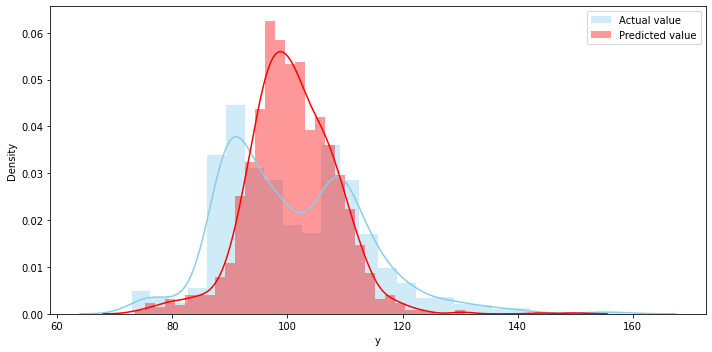

In [50]:
y_pred = model.predict(X_test)
plt.figure(figsize=(10,5))
sns.distplot(y_test[y_test<160], color="skyblue", label="Actual value")
sns.distplot(y_pred[y_pred<160] , color="red", label="Predicted value")
plt.legend()
plt.tight_layout()

## k-fold Cross Validation using XGBoost

In [53]:
dmatrix_train = xgb.DMatrix(data=train_data_feature_trans,label=train_data_target)
params = {'objective':'reg:linear', 'colsample_bytree': 0.3, 'learning_rate': 0.3, 'max_depth': 5, 'alpha': 10}
model_cv = xgb.cv(dtrain=dmatrix_train, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10,
metrics="rmse", as_pandas=True, seed=7)
model_cv.tail(4)

[16:49:24] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:24] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:25] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
26,9.218257,0.160321,11.033188,0.773833
27,9.169047,0.166877,11.030471,0.766388
28,9.085136,0.150843,11.034508,0.751673
29,9.045591,0.134536,11.028953,0.758330


### Prediction on test data set using XGBoost

In [54]:
test_data = test_data.drop(columns={'X11','X93','X107','X233','X235','X268','X289','X290',
'X293','X297','X330','X347'})
test_data.shape

(4209, 365)

In [55]:
test_data.isnull().sum().any()

False

In [56]:
test_data_feature = test_data.drop(columns={'ID'})
print(test_data_feature.shape)

(4209, 364)


In [57]:
test_data_feature.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


In [58]:
test_data_feature['X0'] = le.fit_transform(test_data_feature.X0)
test_data_feature['X1'] = le.fit_transform(test_data_feature.X1)
test_data_feature['X2'] = le.fit_transform(test_data_feature.X2)
test_data_feature['X3'] = le.fit_transform(test_data_feature.X3)
test_data_feature['X4'] = le.fit_transform(test_data_feature.X4)
test_data_feature['X5'] = le.fit_transform(test_data_feature.X5)
test_data_feature['X6'] = le.fit_transform(test_data_feature.X6)
test_data_feature['X8'] = le.fit_transform(test_data_feature.X8)

In [59]:
pca.fit(test_data_feature)

PCA(n_components=0.95)

In [60]:
test_data_feature_trans = pca.fit_transform(test_data_feature)
print(test_data_feature_trans.shape)

(4209, 6)


In [61]:
test_pred = model.predict(test_data_feature_trans)
test_pred

array([ 80.06683 ,  93.98538 , 101.99826 , ...,  91.80938 , 111.085075,
       102.4683  ], dtype=float32)

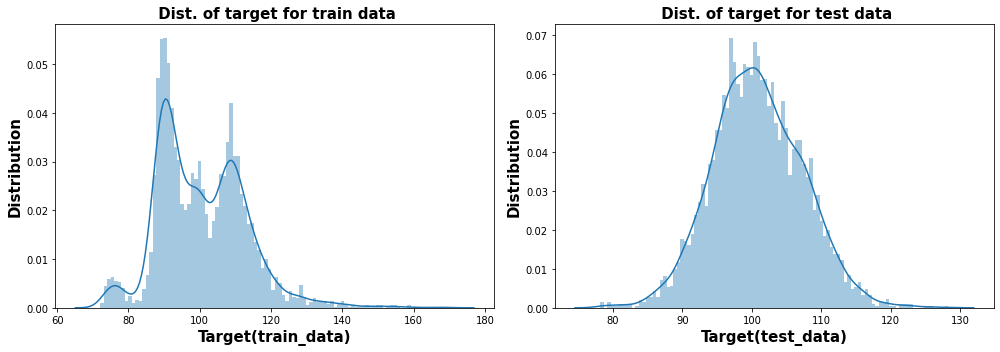

In [62]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
train_plot = sns.distplot(train_data_target[train_data_target<200], bins=100, kde=True, ax=ax[0])
train_plot.set_xlabel('Target(train_data)', weight='bold', size=15)
train_plot.set_ylabel('Distribution', weight='bold', size=15)
train_plot.set_title(' Dist. of target for train data', weight='bold', size=15)
test_plot = sns.distplot(test_pred[test_pred<200], bins=100, kde=True, ax=ax[1])
test_plot.set_xlabel('Target(test_data)', weight='bold', size=15)
test_plot.set_ylabel('Distribution', weight='bold', size=15)
test_plot.set_title(' Dist. of target for test data', weight='bold', size=15)
plt.tight_layout()

# END
## PROJECT SUBMITTED BY MUZAMIL SHOWKAT